# 使用pandas进行时序分析

In [1]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = 'plotly'

## 1.Datetimeindex
相对于Excel，用pandas进行时序分析的优点：
- 大型数据。时序会使数据增长量巨大，很容易就超过了Excel的数据量上限（约1000000条）
- 日期和时间。Excel缺少时区和毫秒时间格式的支持，pandas支持时区，同时精度可达纳秒级
- 缺少功能。Excel缺少基本的时序工具。

### 1.1创建Datetimeindex
pandas为构造DatatimeIndex提供了**data_range函数**。它会接受一个**开始日期、一个频率参数和周期数或者结束日期**。

In [2]:
# 开始日期2024.2.27， 周期数为4， 频率为D(Daily)
daily_index = pd.date_range('2024-2-27', periods=4, freq='D')
daily_index

DatetimeIndex(['2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01'], dtype='datetime64[ns]', freq='D')

In [3]:
# 定义开始和结束时间点，以每周的mon为检视点
weekly_index = pd.date_range('2024-12-2', '2024-12-31', freq='W-SUN')
weekly_index

DatetimeIndex(['2024-12-08', '2024-12-15', '2024-12-22', '2024-12-29'], dtype='datetime64[ns]', freq='W-SUN')

In [4]:
# 通过weekly_index构造DatetimeIndex
# 可以作为只在星期日开放的博物馆的游客人数
pd.DataFrame(data=[21, 15, 33, 34],
             columns=["visitors"], 
             index=weekly_index)

,visitors
2024-12-08,21
2024-12-15,15
2024-12-22,33
2024-12-29,34


In [6]:
df = pd.read_csv('xl/countries-aggregated.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020/1/22,Afghanistan,0,0,0
1,2020/1/22,Albania,0,0,0
2,2020/1/22,Algeria,0,0,0
3,2020/1/22,Andorra,0,0,0
4,2020/1/22,Angola,0,0,0
...,...,...,...,...,...
19339,2020/5/4,West Bank and Gaza,362,102,2
19340,2020/5/4,Western Sahara,6,5,0
19341,2020/5/4,Yemen,12,1,2
19342,2020/5/4,Zambia,137,78,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       19344 non-null  object
 1   Country    19344 non-null  object
 2   Confirmed  19344 non-null  int64 
 3   Recovered  19344 non-null  int64 
 4   Deaths     19344 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 755.8+ KB


In [8]:
# 原始数据中的Date列数据时字符串类型object，可以使用to_datetime()方法转换
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22 00:00:00,Afghanistan,0,0,0
1,2020-01-22 00:00:00,Albania,0,0,0
2,2020-01-22 00:00:00,Algeria,0,0,0
3,2020-01-22 00:00:00,Andorra,0,0,0
4,2020-01-22 00:00:00,Angola,0,0,0
...,...,...,...,...,...
19339,2020-05-04 00:00:00,West Bank and Gaza,362,102,2
19340,2020-05-04 00:00:00,Western Sahara,6,5,0
19341,2020-05-04 00:00:00,Yemen,12,1,2
19342,2020-05-04 00:00:00,Zambia,137,78,3


### 1.2筛选DatetimeIndex

In [15]:
df = df.reset_index().set_index('Date')
df = df.drop(columns=['index'])
df

,Country,Confirmed,Recovered,Deaths
Date,,,,
2020-01-22,Afghanistan,0,0,0
2020-01-22,Albania,0,0,0
2020-01-22,Algeria,0,0,0
2020-01-22,Andorra,0,0,0
2020-01-22,Angola,0,0,0
...,...,...,...,...
2020-05-04,West Bank and Gaza,362,102,2
2020-05-04,Western Sahara,6,5,0
2020-05-04,Yemen,12,1,2


In [43]:
tf = df['Country']=='Australia'

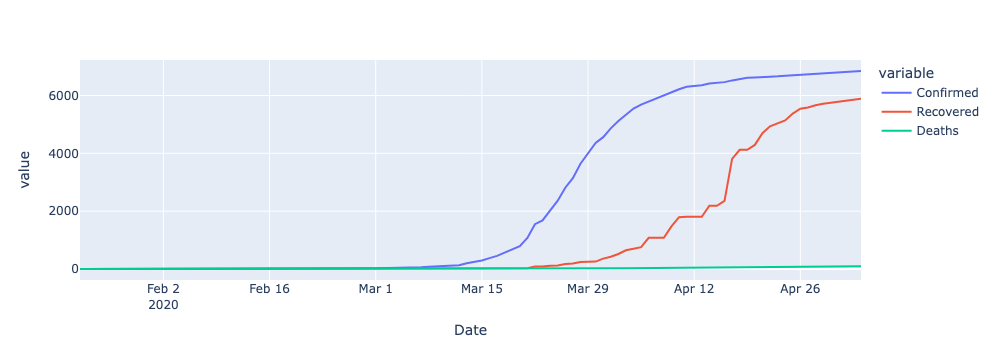

In [44]:
df.loc[tf, ['Confirmed', 'Recovered', 'Deaths']].plot()

## 2.常见时序操作

### 2.1移动和百分比变化率

### 2.2基数的更改和相关性

### 2.3重新采样

### 2.4滚动窗口

## 3.pandas的局限性